<a href="https://colab.research.google.com/github/petrucior/verilog/blob/main/verilog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aulas de Verilog
---------------

Author: Petrúcio Medeiros

In [1]:
# biblioteca e plugin para verilog
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin
!chmod a+x -R /content/nvcc4jupyter/verilog/

  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-bttip6hk
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-bttip6hk
  Created wheel for ColabPlugin: filename=ColabPlugin-blind-py3-none-any.whl size=12727 sha256=8cdc1a2450a2f8513e781d4f530cde49533b709c80328016706417b8df59d179
  Stored in directory: /tmp/pip-ephem-wheel-cache-ryc1_h97/wheels/97/a0/61/b9e5e1f61c5cfd624df291d57f6731a0f5832606b9ced448ef
Failed to build ColabPlugin
    Running setup.py install for ColabPlugin ... done
  DEPRECATION: ColabPlugin was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
Cloning into 'nvcc4jupyter'...
remote: Enumerating objects: 1147, done.
remote: Counting objects: 100% (362/362), done.
remote: Compressing objects: 100% (271/271),

# Estrutura básica do verilog
---

```verilog
module nome_modulo( lista_portas );
      // Declaração de portas

      // Variáveis intermediárias

      // Funcionamento do circuito
endmodule
```

- Inicia com `module` e encerra com `endmodule`
- Case-sensitive
- Todas as palavras chaves são minúsculas
- Espaços em branco não são interpretados
- Todos os comandos terminam em ponto-e-vírgula
- Comentário em uma única linha: //
- Comentário em múltiplas linhas: /* */

Exemplo:
```verilog
module halfadder( a, b, s, cout );
      ( ... )
endmodule
```

<img align="center" width="300" height="250" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Halfadder.gif/1280px-Halfadder.gif">


## Declaração de portas
---

- Portas são usadas para comunicação do módulo com o mundo exterior

  - **input** -> entrada;

  - **output** -> saída;

  - **inout** -> bidirecional (entrada/saída);

- Declaração de portas simples (1 bit):
```
<tipo_da_porta> nome_da_porta;
```

Exemplo:
```verilog
module halfadder( a, b, s, cout );
      input a, b; // Declarando a e b como entradas de 1 bit
      output s, cout; // Declarando s e cout como saidas de 1 bit
endmodule
```

- Declaração de barramentos (conjunto de bits):
```
<tipo_da_porta> [MSB:LSB] nome_da_porta;
```

Exemplo:
```verilog
module halfadder( a, b, cin, s, cout );
      input [3:0] a, b; // Declarando a e b como entradas de 4 bits
      input cin; // Declarando cin como entrada de 1 bit
      output [3:0] s; // Declarando s como saida de 4 bits
      output cout; // Declarando cout como saida de 1 bit
endmodule
```

- Definição de constantes (`parameter`)
  - São valores que permanecem constantes em todo o módulo, não podendo ter seus valores alterados
  - O uso de constantes pode tornar o código mais legível e mais fácil de atualizações
    - Obs.: A declaração de uma constante pode ser feita a qualquer momento no código verilog

- Declaração de constante:
```
parameter nome = valor;
```

Exemplo:
```verilog
module adder( a, b, cin, s, cout );
      parameter largura = 4;
      input [largura - 1:0] a, b; // Declarando a e b como entradas de 4 bits
      input cin; // Declarando cin como entrada de 1 bit
      output [largura - 1:0] s; // Declarando s como saida de 4 bits
      output cout; // Declarando cout como saida de 1 bit
endmodule
```

## Variáveis intermediárias
---

- São variáveis internas ao módulo
  - Tipo fio (Net Data Type): Representam uma conexão física (fio) interno ao módulo
  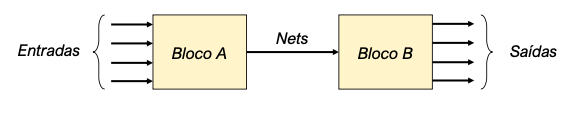
  - Registradores (Variable Data Type): Representam um armazenamento local (registrador) 
  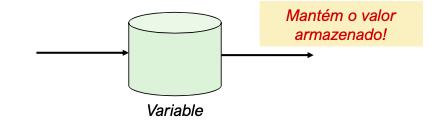


**Tipos de fios (Net Data Type)**
- Não apresentam capacidade de armazenamento

|`        Tipo                         `|`            Definição            `|
|:-------:|:-----------------------------------:|
|   wire  | Representa uma conexao (fio fisico) |
|   tri   |   Representa uma conexao tri-state  |
| supply0 |          Nivel logico BAIXO         |
| supply1 |          Nivel logico ALTO          |


Exemplo:
```verilog
wire ligacao;
wire [7:0] soma;
tri barramento; //permite três possíveis estados na saída do circuito: Nível lógico Alto, Nível lógico Baixo e Alta-impedância( Hi-Z)
```
Obs.: A declaração de Nets com mais de um bit é feita da mesma forma dos ports.

**Registrador (Variable Data Type)** 
- Apresentam capacidade de armazenamento
- Mais comum: tipo `reg`
  - Não podem ser utilizados para ligação da saída de um bloco para entrada de outro (deve-se utilizar `wire`)
  - Podem ter seus valores mudados apenas por um procedimento (`always`)

|`        Tipo                         `|`            Definição            `|
|:------------------:|:-------------------------------:|
|         reg        |         Valor sem sinal         |
|     reg signed     |         Valor com sinal         |
|       integer      |   Inteiro com sinal de 32-bits  |
| real,time,realtime | Nao sintetizáveis pelo Hardware |

Exemplo:
```verilog
reg [7:0] resultado;
integer count;
```
Obs.: A declaração de Register com mais de um bit é feita da mesma forma dos ports.

Regras de entrada/saída:

|` Tipo de Variavel      `|`      Entrada      `|`      Saida     `|`      IN/OUT `|
|:----------------:|---------|-------|--------|
|        reg       | NAO     | SIM   | NAO    |
|       wire       | SIM     | SIM   | SIM    |

## Funcionamento do circuito
---

- Descreve como o circuito funciona


- Abordagens:

  - **Estrutural**: Descreve o circuito em termos das portas lógicas, blocos e suas interconexões;
  - **Fluxo de Dados (RTL)**: Descreve o circuito em termos de expressões (lógicas e aritméticas) que relacionam entradas e saídas;
  - **Hierárquica**: Descreve o circuito pela associação de blocos previamente definidos, permitindo a construção de um sistema maior; 
  - **Comportamental**: Descreve o circuito em termos do seu comportamento (algoritmo);

### Descrição estrutural

- Descreve o circuito em termos das portas lógicas, blocos e suas interconexões
- Para isso, utiliza primitivas para construir o comportamento do circuito
- Blocos elementares (primitivas) -> **portas lógicas**

|    **Tipo de Primitivas**    	|    **Primitivas Existentes**    	|
|:----------------------------:	|:-------------------------------:	|
|     Portas multientradas     	|  and, or, nand, nor, xor e xnor 	|
| Portas com uma unica entrada 	|            not e buf            	|
|       Portas tri-state       	| bufif0, bufif1, notif0 e notif1 	|

- Para fazer um circuito usando as primitivas, basta referenciar a porta lógica e indicar as ligações.
  ```
  <primitiva> nome (ligação);
  ```
 
 - `<primitiva>`: and, or, nand, nor, xor, xnor, not, buf, bufif0, bufif1, notif0 ou notif1;
 - nome: Recomendável, mas não obrigatório;
 - ligação: como os pinos da primitiva estão ligados, separados entre virgulas
    - Primeiro item é sempre saída
    - Os itens seguintes são as entradas

Exemplos:
```verilog
/*
  Porta lógica: and
  Saída: x
  Entradas: a e b
  Nome: u0
*/
and u0 (x, a, b);
```

```verilog
/*
  Porta lógica: not
  Saída: y
  Entradas: x
  Nome: u1
*/
not u1 (y, x);
```

**Construir o circuito utilizando abordagem estrutural é só:**
- Referenciar as primitivas adequadas;
- Realizar as ligações entre elas.
Obs.: Para ligar a saída de uma primitiva para entrada de outra, deve-se declarar um fio intermediário (`wire`).

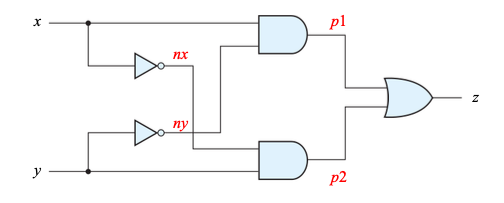

|` 	       x 	       `|` 	       y 	       `|` 	       nx 	       `|` 	       ny 	       `|` 	       p1 	       `|` 	       p2 	       `|` 	       z 	       `|
|-----------	|-------	|------------	|--------	|--------	|--------	|-------	|
| 0         	| 0     	| 1          	| 1      	| 0      	| 0      	| 0     	|
| 0         	| 1     	| 1          	| 0      	| 0      	| 1      	| 1     	|
| 1         	| 0     	| 0          	| 1      	| 1      	| 0      	| 1     	|
| 1         	| 1     	| 0          	| 0      	| 0      	| 0      	| 0     	|


Exemplos:
```verilog
/*
  Declaração do módulo
*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Variáveis (fios) intermediárias
  wire nx, ny, p1, p2;

  // Ligação estrutural
  not not0 (nx, x);
  not not1 (ny, y);
  and and0 (p1, x, ny);
  and and1 (p2, y, nx);
  or or0 (z, p1, p2);
endmodule
```

#### Simulação



In [3]:
%%verilog

/*

Módulo circuito

*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Variáveis (fios) intermediárias
  wire nx, ny, p1, p2;

  // Ligação estrutural
  not not0 (nx, x);
  not not1 (ny, y);
  and and0 (p1, x, ny);
  and and1 (p2, y, nx);
  or or0 (z, p1, p2);
endmodule


/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores para x e y
parameter nbits = 4; // 2^{entradas} = 2^{2} = 4
reg [1:0] counter; // Criando um registro de 2 bits para entradas (x,y)
wire z; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades 2^{entradas} = 2^{2} = 4
	circuito t(counter[1],counter[0],z); // Executando "circuito"
	initial begin // // Início do bloco de comandos
		$display("xy | z"); // printf apenas com string
		$monitor("%2b | %1b", counter, z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

xy | z
00 | 0
01 | 1
10 | 1
11 | 0



#### Exercício: Descrever o circuito usando a descrição estrutural.

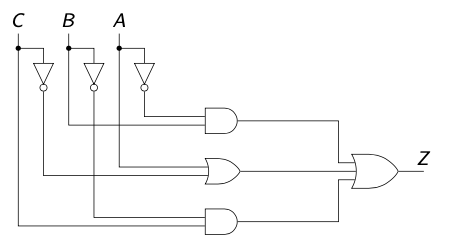

In [13]:
%%verilog

/*

Módulo exercicio

*/

/*
module exercicio( /* Adicione seu código aqui */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */  

  // Variáveis (fios) intermediárias
  /*
    Adicione seu código aqui
  */

  // Estrutura
  /*
    Adicione seu código aqui
  */

endmodule
*/

/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores para a,b,c
parameter nbits = 8; // 2^{entradas} = 2^{3} = 8
reg [2:0] counter; // Criando um registro de 3 bits para entradas (a,b,c)
wire z; // Declarando um fio de saída do "exercicio"
integer k; // Declarando um inteiro para percorrer todas as possibilidades 2^{entradas} = 2^{3} = 8
	exercicio a(counter[2],counter[1],counter[0],z); // Executando "exercicio"
	initial begin // // Início do bloco de comandos
		$display("abc | z"); // printf apenas com string
		$monitor("%3b | %1b", counter, z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

/tmp/tmpf6tp4kwq/04614698-eb9b-428d-9797-76135595ea4f.v:9: syntax error
I give up.

